In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diamonds/diamonds.csv


In [2]:
data = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [3]:
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


The data set one unnecessary column "Unnamed:0" 



Let us see if the data contains any null values 

In [9]:
#Let me drop the first column
del data['Unnamed: 0']

In [10]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The dataset is completely perfect . We can start feature engineering

Let me visualize the data 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

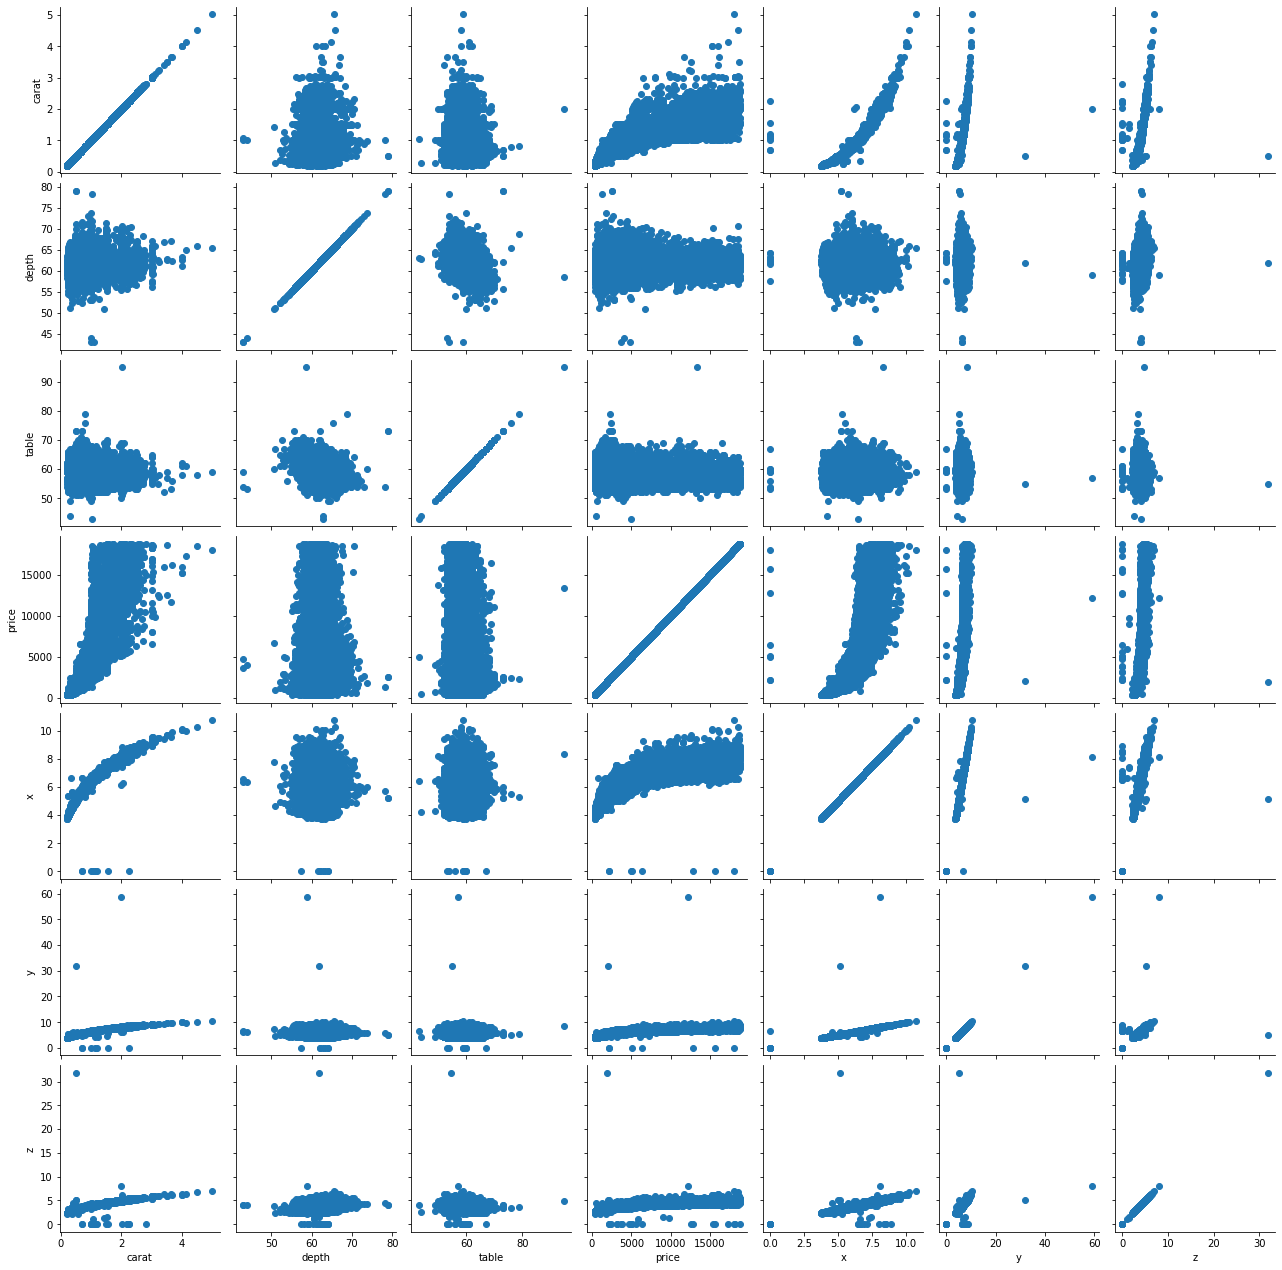

In [11]:
x= sns.PairGrid(data)
x = x.map(plt.scatter)

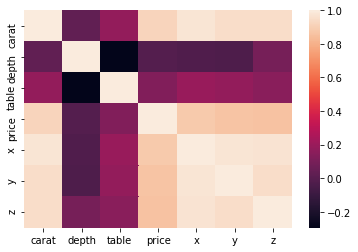

In [13]:
#Let us see the correlation between the columns
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

From the above corr heat map we can see that carat,x,y,z have the highest correlation with the price column

Now let me do some feature Engineering 

In [15]:
print(data.cut.unique())
print(data.color.unique())
print(data.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


We can use label encoder now for the above columns

In [16]:
data1 = data

In [17]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
data1['cut_encoded']= le.fit_transform(data['cut']) 
data1['color_encoded']= le.fit_transform(data['color'])
data1['clarity_encoded']=le.fit_transform(data['clarity'])

In [18]:
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3


In [19]:
data1.corr()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,-0.088223
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,-0.071535
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,-0.224263
cut_encoded,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.028235
color_encoded,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,-0.027795
clarity_encoded,-0.214290,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,0.028235,-0.027795,1.000000


from the above correlation 

I'm selecting carat,x,y,z

and cut_encoded,color_encoded,clarity_encoded doest show much importance

In [20]:
simple = data1[['carat','x','y','z','price']]

In [21]:
simple.head()

,carat,x,y,z,price
0,0.23,3.95,3.98,2.43,326
1,0.21,3.89,3.84,2.31,326
2,0.23,4.05,4.07,2.31,327
3,0.29,4.20,4.23,2.63,334
4,0.31,4.34,4.35,2.75,335


In [22]:
simple.shape

(53940, 5)

In [23]:
simple.corr()

,carat,x,y,z,price
carat,1.000000,0.975094,0.951722,0.953387,0.921591
x,0.975094,1.000000,0.974701,0.970772,0.884435
y,0.951722,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.970772,0.952006,1.000000,0.861249
price,0.921591,0.884435,0.865421,0.861249,1.000000


In [24]:
X=simple.drop(columns=['price'])
y=simple.price

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
#shape of training and test set

print(X_train.shape)
print(X_test.shape)

(43152, 4)
(10788, 4)


I chose to use LinearRegression as most of the time it gives best results

In [26]:
from sklearn.linear_model import *

lr = LinearRegression()


Training the model

In [27]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lr.score(X_test,y_test))


0.8380486055773406


Well model is almost perfect with 83 percent of accuracy